<a href="https://colab.research.google.com/github/smoody-mines/MSE504/blob/main/Copy_of_Copy_of_Midterm_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Midterm 1, MSE 504, 2025**

- Instructor: Sergei V. Kalinin
- TA: Aditya Raghavan
- Sean Moody
- Energy Science Engineering

Special instructions:
- please add your name and department
- please share the midterm **both** with instructor (to gmail account) and TA
- (parenthetically, make sure that all the previous homeworks are shared with Aditya as well!)
- choose 2 out of 3 problems (I. Elements, II. Spectra, III. Images) below as a Midterm 1.

# I. Element Analysis

Use the Matminer to create a table of element descriptors, and explore correlations and classification.

In [3]:
!pip install matminer
!pip install mdf_forge
!pip -q install mdf-toolbox mdf-forge
!pip install figrecipes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 31.6 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=4354

1. Download the MatMiner data set of your choice (e.g. castelli perovskites, mechanical properties, JARVIS data sets, etc). The instructions will be on https://hackingmaterials.lbl.gov/matminer/dataset_summary.html. Choose the data set that best aligns with your research interests. Ideally, the data set will contain composition information and several properties. Use the notebooks on course GitHub or (even better) original MatMiner website as examples.

In [4]:
# matminer imports
from matminer.datasets import load_dataset
from matminer.featurizers import composition, structure, site, bandstructure
from matminer.featurizers.base import BaseFeaturizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymatgen.core import Composition

df=load_dataset("wolverton_oxides")
#df.head()

#need to create composition objects because they are stored as string in dataset
#custom composition class from import I think, has public getters for info
df["composition"] = df["formula"].apply(lambda x: Composition(x))



def filter_by_element(df, element_symbol):
    """Return subset of dataframe containing given element in composition."""
    mask = df['formula'].apply(lambda x: element_symbol in Composition(x))
    subset = df[mask]
    print(f"{len(subset)} entries contain {element_symbol}.")
    return subset

filter_Ir = filter_by_element(df, "Ir")
filter_Ir.head()


Fetching wolverton_oxides.json.gz from https://ndownloader.figshare.com/files/13354616 to /usr/local/lib/python3.12/dist-packages/matminer/datasets/wolverton_oxides.json.gz


Fetching https://ndownloader.figshare.com/files/13354616 in MB: 0.16383999999999999MB [00:00, 131.14MB/s]     


140 entries contain Ir.


,formula,atom a,atom b,lowest distortion,e_form,e_hull,mu_b,vpa,gap pbe,a,b,c,alpha,beta,gamma,e_form oxygen,composition
27,AcIrO3,Ac,Ir,orthorhombic,-2.194,0.075,0,13.405,0.754,5.616,5.907,8.082,90,90,90,1.277,"(Ac, Ir, O)"
100,AgIrO3,Ag,Ir,rhombohedral,-0.591,0.154,0.007,11.313,0.000,5.367,5.367,5.367,61.6,61.6,61.6,1.233,"(Ag, Ir, O)"
173,AlIrO3,Al,Ir,cubic,-0.630,1.482,0.046,11.877,0.000,3.901,3.901,3.901,90,90,90,0.139,"(Al, Ir, O)"
246,AsIrO3,As,Ir,cubic,-0.244,0.958,-0.028,11.930,0.000,3.907,3.907,3.907,90,90,90,0.020,"(As, Ir, O)"
319,AuIrO3,Au,Ir,cubic,-0.130,0.602,0.254,11.997,0.000,3.915,3.915,3.915,90,90,90,0.910,"(Au, Ir, O)"


In [5]:
#just testing the composition object to understand it
comp = Composition("Fe2O3")

print("Composition:", comp)
print("As dictionary:", comp.as_dict())
print("Elements:", [el.symbol for el in comp.elements])
print("Fe fraction:", comp.get_atomic_fraction("Fe"))
print("O fraction:", comp.get_atomic_fraction("O"))
print("Molar mass (g/mol):", comp.weight)
print("Number of atoms:", comp.num_atoms)
print("Reduced formula:", comp.reduced_formula)

Composition: Fe2 O3
As dictionary: {'Fe': 2.0, 'O': 3.0}
Elements: ['Fe', 'O']
Fe fraction: 0.4
O fraction: 0.6
Molar mass (g/mol): 159.6882 amu
Number of atoms: 5.0
Reduced formula: Fe2O3


2. Featurize the data set, e.g. using compositional and structural MagPie features.

In [6]:
#creating numerical descriptors
from matminer.featurizers.composition import ElementProperty

ep = ElementProperty.from_preset("magpie")
#add as new cols in dataframe
df = df.loc[:, ~df.columns.str.contains("MagpieData")]

df = ep.featurize_dataframe(df,col_id="composition")



/usr/local/lib/python3.12/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


ElementProperty:   0%|          | 0/4914 [00:00<?, ?it/s]

In [7]:
df.head()
print(df.columns.tolist())

#checking to see what bandgap is named, there are several magpie features that also include bandgap in some way, using gap pbe
for i in df.columns.tolist():
  if "gap" in i:
    print(i)


['formula', 'atom a', 'atom b', 'lowest distortion', 'e_form', 'e_hull', 'mu_b', 'vpa', 'gap pbe', 'a', 'b', 'c', 'alpha', 'beta', 'gamma', 'e_form oxygen', 'composition', 'MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range Number', 'MagpieData mean Number', 'MagpieData avg_dev Number', 'MagpieData mode Number', 'MagpieData minimum MendeleevNumber', 'MagpieData maximum MendeleevNumber', 'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber', 'MagpieData avg_dev MendeleevNumber', 'MagpieData mode MendeleevNumber', 'MagpieData minimum AtomicWeight', 'MagpieData maximum AtomicWeight', 'MagpieData range AtomicWeight', 'MagpieData mean AtomicWeight', 'MagpieData avg_dev AtomicWeight', 'MagpieData mode AtomicWeight', 'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT', 'MagpieData range MeltingT', 'MagpieData mean MeltingT', 'MagpieData avg_dev MeltingT', 'MagpieData mode MeltingT', 'MagpieData minimum Column', 'MagpieData maximum Column', 'Mag

With this, you will get a data set containing certain number of compounds, their properties (dependent on the data set you have chosen it can be bandgap, mechanical, dielectric constants, etc), and an associated descriptor vector.

### Problem I.1. Clustering of Elements

I.1.1. Now, create labels. You can:
- Use your property column to classify the materials as metals (bandgap <0.01, semiconductors (0.0.1 < bandgap < 0.3), and dielectrics (bandgap >0.3).
- Or do the same for the mechnical properties, melting temperatures, and so on. Note that this classification will be somewhat ad hoc (but then classification based on numerical parameters is a special case of regression)

With that, using the MagPie features, show the
- UMap
- t-SNE

representations. Visualize the distribution of classes in this space by superimposing the class labels on top of the graphs.

In [8]:
def show_col(df, column_name, n=10):
    subset = df[["formula", column_name]].head(n)
    print(f"\nShowing first {n} rows for '{column_name}':")
    display(subset)
    return True

show_col(df, "gap pbe")


Showing first 10 rows for 'gap pbe':


,formula,gap pbe
0,Ac2O3,0.332
1,AcAgO3,0.000
2,AcAlO3,4.307
3,AcAsO3,0.000
4,AcAuO3,0.745
5,AcBO3,1.071
6,AcBaO3,0.000
7,AcBeO3,0.000
8,AcBiO3,1.639
9,AcCaO3,0.000


True

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

def label_bandgap(bg):
    """Map band gap (eV) to class label."""
    if pd.isna(bg):
        return "unknown"
    if bg < 0.01:
        return "metal"
    elif bg < 0.3:
        return "semiconductor"
    else:
        return "dielectric"

df["class_bg"] = df["gap pbe"].apply(label_bandgap)
#show_col(df, "class_bg")


# Grab only the Magpie-generated feature columns
feature_cols = [c for c in df.columns if c.startswith("MagpieData ")]

# Drop rows with NaN features or unknown class
df_clean = df.dropna(subset=feature_cols + ["class_bg"]).copy()

X = df_clean[feature_cols].values
y = df_clean["class_bg"].astype(str).values.ravel()

# Standardize features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#df_clean.head()
#df.head()
#print(len(df), len(df_clean))

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


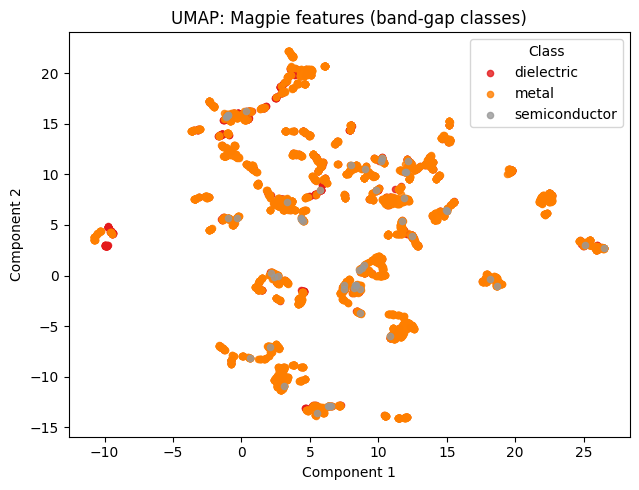

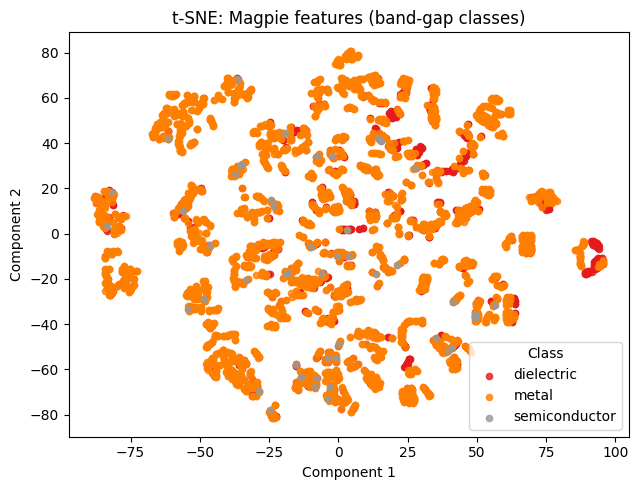

In [40]:
umap_model = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    metric="euclidean",
    random_state=42
)
X_umap = umap_model.fit_transform(X_scaled)

#just does PCA as preprocessing for the t-SNE model
pca = PCA(n_components=min(50, X_scaled.shape[1]))
X_pca = pca.fit_transform(X_scaled)

tsne_model = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    random_state=42
)
X_tsne = tsne_model.fit_transform(X_pca)


def scatter_with_labels(embedding, labels, title):
    plt.figure(figsize=(6.5, 5.0))
    classes = sorted(set(labels))
    colors = plt.cm.Set1(np.linspace(0, 1, len(classes)))
    for color, cls in zip(colors, classes):
        mask = (labels == cls)
        plt.scatter(embedding[mask, 0], embedding[mask, 1],
                    s=20, alpha=0.8, label=cls, color=color)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Class", frameon=True)
    plt.tight_layout()
    plt.show()

labels = y  # your band-gap classes
scatter_with_labels(X_umap, labels, "UMAP: Magpie features (band-gap classes)")
scatter_with_labels(X_tsne, labels, "t-SNE: Magpie features (band-gap classes)")

I.1.2. Dimensionality reduction. Use PCA to dimensionally reduce the magPie labels.
- Plot the resulting data sets using the labels you have created. Is any strucutre obvious in the distributions?
- Plot the strucutre of the PCA eigenvectors.

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

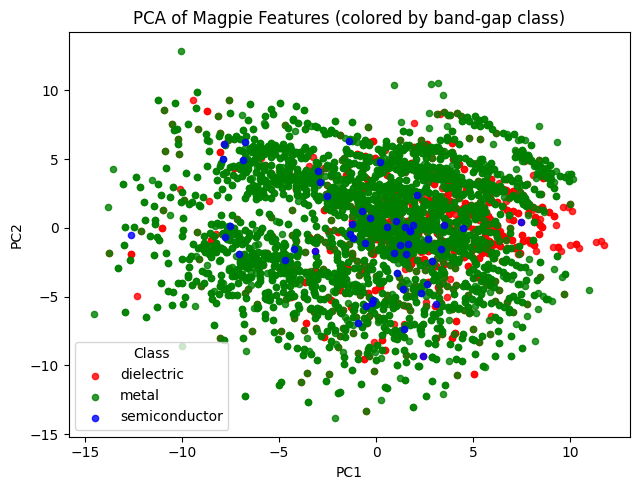

In [42]:
plt.figure(figsize=(6.5,5))
for cls, color in zip(sorted(set(y)), ['r','g','b']):
    mask = (y == cls)
    plt.scatter(X_pca[mask,0], X_pca[mask,1], s=20, alpha=0.8, label=cls, color=color)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Magpie Features (colored by band-gap class)")
plt.legend(title="Class")
plt.tight_layout()
plt.show()


Top contributing features to PC1:


,0
MagpieData avg_dev CovalentRadius,0.191244
MagpieData mean CovalentRadius,0.190640
MagpieData mean MendeleevNumber,0.184833
MagpieData avg_dev MendeleevNumber,0.184317
MagpieData avg_dev Column,0.181938
MagpieData range CovalentRadius,0.180073
MagpieData maximum CovalentRadius,0.180073
MagpieData mean Column,0.179983
MagpieData minimum MendeleevNumber,0.167739
MagpieData range MendeleevNumber,0.167295


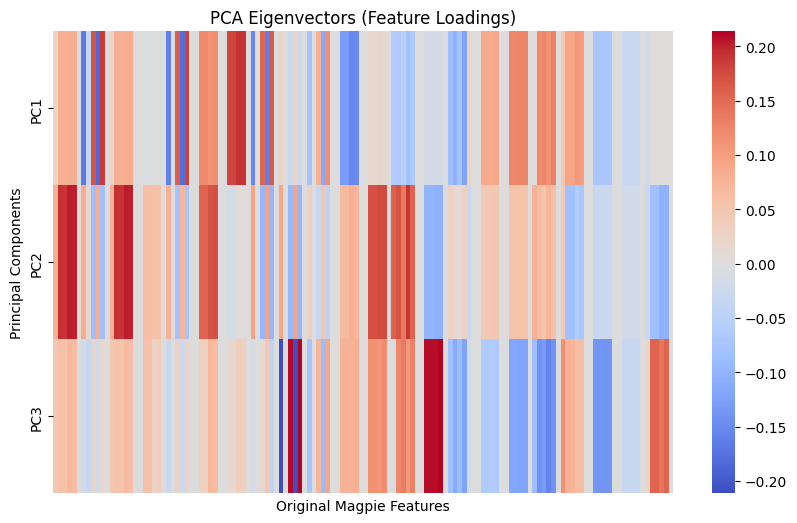

In [43]:
# Get feature importance for PC1
loadings = pd.Series(pca.components_[0], index=feature_cols)
print("\nTop contributing features to PC1:")
display(loadings.abs().sort_values(ascending=False).head(10))

# Optional: heatmap of first few PCs vs features
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(pca.components_[:3], cmap="coolwarm", center=0,
            xticklabels=False, yticklabels=["PC1","PC2","PC3"])
plt.title("PCA Eigenvectors (Feature Loadings)")
plt.xlabel("Original Magpie Features")
plt.ylabel("Principal Components")
plt.show()

In [54]:
#print(X_scaled.shape[1] == 1)


#just some debugging and checking things
'''
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance (%)")
plt.title("Scree Plot")
plt.grid(True)
plt.show()


plt.figure(figsize=(6,4))
plt.plot(
  np.arange(1, 11),
  np.cumsum(pca.explained_variance_ratio_[:10]) * 100,
  marker="o"
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained (%)")
plt.title("Scree Plot (First 10 PCs)")
plt.grid(True)
plt.show()
#elbow at 1.00

print(X_scaled.shape) # 132 magpie descriptor features
print(len(feature_cols)) #
print(pca.explained_variance_ratio_[:5])
'''

'\nplt.plot(np.cumsum(pca.explained_variance_ratio_)*100)\nplt.xlabel("Number of Components")\nplt.ylabel("Cumulative Variance (%)")\nplt.title("Scree Plot")\nplt.grid(True)\nplt.show()\n\n\nplt.figure(figsize=(6,4))\nplt.plot(\n  np.arange(1, 11),\n  np.cumsum(pca.explained_variance_ratio_[:10]) * 100,\n  marker="o"\n)\nplt.xlabel("Number of Components")\nplt.ylabel("Cumulative Variance Explained (%)")\nplt.title("Scree Plot (First 10 PCs)")\nplt.grid(True)\nplt.show()\n#elbow at 1.00 \n\nprint(X_scaled.shape) # 132 magpie descriptor features \nprint(len(feature_cols)) #\nprint(pca.explained_variance_ratio_[:5]) \n'

I.1.3. Use the GMM to cluster the MagPie descriptors.
- Visualize the GMM labels in the PCA space for descripotrs
- Calculate the correlation matrics between your clases and GMM descriptors.

I.1.4. Perform the Canonical Correlation Analysis between the MagPie descriptors and the properties. Show the CCA scores and eigenvecotrs. Using domain intuition and ChatGPT, explore the meaning of correlations.

### Problem I.2.Supervised learning

I.2.1. Simple classification
- Build the decision tree classifier for your labels.
- Calculate confusion matrix, ROC, and AUC.
- Explore the effect of classifier depth on AUC

I.2.2. LDA or QDA. Now use the LDA (or QDA) to classify the elements using 2 of the labels you have created as targets.
- Visualize the resulting distributions.
- If you have more then two labels (e.g. metal, dielectric, semicondutor) explore where the third label will be localized.
- Visualize the LDA (QDA) eigenvectors.

# II. Classification of spectral data

Let's explore and analyze the cathodoluminiscence data from hybrid perovskite solid solutions. Use the ChatGPT to explore how the CL spectra are acquired and what we can learn from them.

In [12]:
!pip install atomai pyroved

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.0/179.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 91.2 MB/s eta 0:00:00
  Created wheel for mendeleev: filename=mendeleev-0.6.1-py2.py3-none-any.whl size=174958 sha256=314849861db75df38dc1dbe56bcc64482837f3ae6ad2ef1d61e93bdf0bd239ac
  Stored in directory: /root/.cache/pip/wheels/80/94/4c/df5677f3568e71c6af01d54151a79e934f6f8c4b274bcad119
Successfully built mendeleev


In [13]:
from copy import deepcopy as dc

import numpy as np
import torch
import h5py

from scipy import ndimage
from sklearn import decomposition

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pyroved as pv
import atomai as aoi
import matplotlib.pyplot as plt

# Libraries for data processing and machine learning
from sklearn.linear_model import Perceptron, LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
# For image/data manipulation
from scipy.ndimage import zoom

Let's import 4 data sets.

In [14]:
!gdown https://drive.google.com/uc?id=11h-E07ytavAjd2VNtwZUSnfc0sY-RDBt
!gdown https://drive.google.com/uc?id=1MlCxquvM94lMoWa3Yhmc-pZ7TfqbwEN0
!gdown https://drive.google.com/uc?id=1VYR0LouoEbWk8pr5-7WjH_k2INqTmr1P
!gdown https://drive.google.com/uc?id=1xEWo5hOsS59HAq6b-x-D3NWkfC9bC6iN

Downloading...
From: https://drive.google.com/uc?id=11h-E07ytavAjd2VNtwZUSnfc0sY-RDBt
To: /content/0220415_D45_30kx_5kV_32pA_LV_200ms_119X80_40nm_1_corrected.h5
100% 19.8M/19.8M [00:00<00:00, 76.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MlCxquvM94lMoWa3Yhmc-pZ7TfqbwEN0
To: /content/0220415_D48_30kx_5kV_32pA_LV_400ms_119X80_40nm_2_corrected.h5
100% 19.7M/19.7M [00:00<00:00, 67.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VYR0LouoEbWk8pr5-7WjH_k2INqTmr1P
To: /content/0220418_D50_30kx_5kV_32pA_LV_400ms_119X80_40nm_1MHz_8g_re_corrected (1).h5
100% 15.4M/15.4M [00:00<00:00, 64.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xEWo5hOsS59HAq6b-x-D3NWkfC9bC6iN
To: /content/20220510_D17_30kx_5kV_32pA_LV_400ms_119X80_40nm_1MHz_3g_corrected.h5
100% 49.5M/49.5M [00:00<00:00, 75.7MB/s]


In [15]:
h5_f1 = h5py.File(r'/content/0220415_D45_30kx_5kV_32pA_LV_200ms_119X80_40nm_1_corrected.h5', 'r+')
h5_f2 = h5py.File(r'/content/0220415_D48_30kx_5kV_32pA_LV_400ms_119X80_40nm_2_corrected.h5', 'r+')
#h5_f3 = h5py.File(r'/content/0220418_D50_30kx_5kV_32pA_LV_400ms_119X80_40nm_1MHz_8g_re_corrected (1).h5', 'r+')
h5_f4 = h5py.File(r'/content/20220510_D17_30kx_5kV_32pA_LV_400ms_119X80_40nm_1MHz_3g_corrected.h5', 'r+')

... and explore their structure. Use ChatGPT to explore what is hdf5 and why it is convenient way to store instrumental data.

In [16]:
print(h5_f4.keys())
print(h5_f4['Acquisition2'].keys())
print(h5_f4['Acquisition2']['ImageData'].keys())

<KeysViewHDF5 ['Acquisition0', 'Acquisition1', 'Acquisition2']>
<KeysViewHDF5 ['ImageData', 'PhysicalData', 'SVIData', 'StateEnumeration']>
<KeysViewHDF5 ['DimensionScaleC', 'DimensionScaleX', 'DimensionScaleY', 'DimensionScaleZ', 'Image', 'PrimaryGlassMediumInterfacePosition', 'SecondaryGlassMediumInterfacePosition', 'TOffset', 'XOffset', 'YOffset', 'ZOffset']>


(1, 1, 1, 3840, 5760)


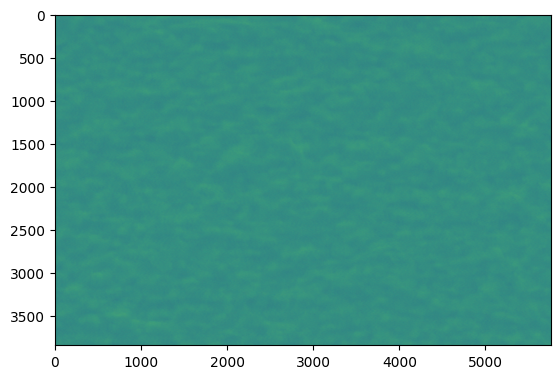

In [17]:
print(h5_f4['Acquisition0']['ImageData']['Image'].shape)
im0 = np.squeeze(h5_f4['Acquisition0']['ImageData']['Image'])
plt.imshow(im0)

(1, 1, 1, 1280, 1904)


(np.float64(-0.5), np.float64(1903.5), np.float64(1279.5), np.float64(-0.5))

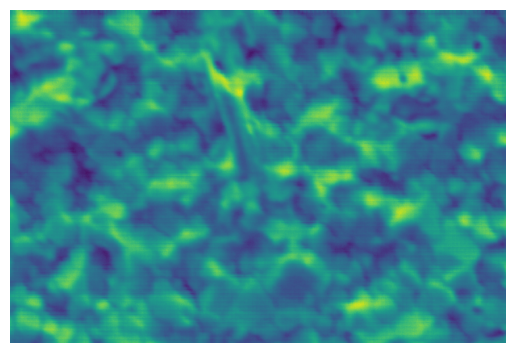

In [18]:
print(h5_f4['Acquisition1']['ImageData']['Image'].shape)
im1 = np.squeeze(h5_f4['Acquisition1']['ImageData']['Image'])
plt.imshow(im1)
plt.axis('off')

(1024, 1, 1, 80, 119)


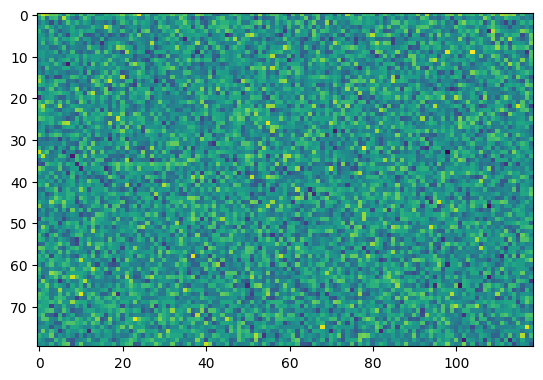

In [19]:
print(h5_f4['Acquisition2']['ImageData']['Image'].shape)
im2 = np.squeeze(h5_f4['Acquisition2']['ImageData']['Image'])
plt.imshow(im2[200,:,:])

In [20]:
dataset = im2.astype(np.float64)
print(dataset.shape)
d1, d2, d3 = dataset.shape
dataset = dataset.reshape(d1, d2*d3)

(1024, 80, 119)


In [21]:
y = torch.from_numpy(np.array(dataset.T))[:, None]
y = torch.nn.functional.avg_pool1d(y, 1, 1).squeeze().numpy()
print(y.shape)
_, s1 = y.shape

(9520, 1024)


In [22]:
y = y.reshape(d2, d3, s1)

In [23]:
hdata = y
hdata = hdata.astype(np.float64)

In [24]:
x=np.linspace(162.17, 1033.31, 1024) #128
wavelength = x

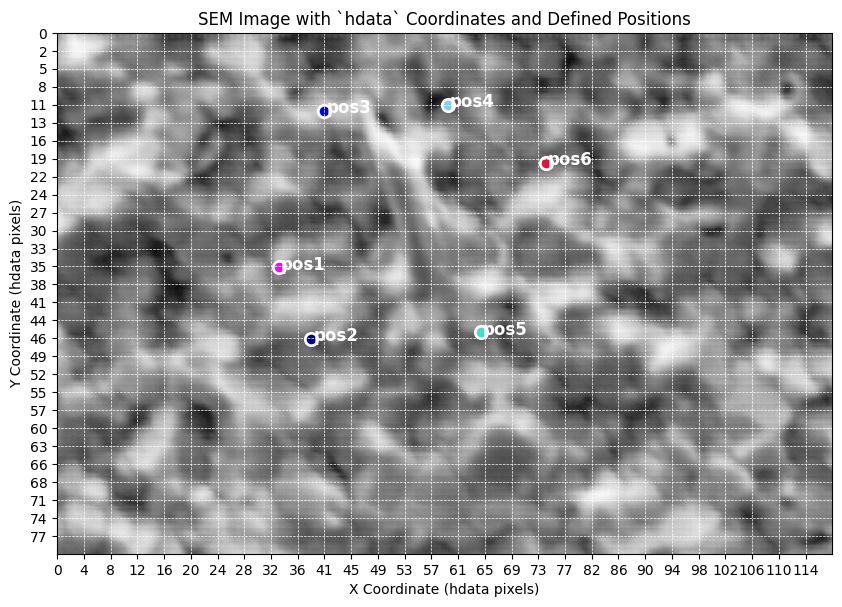

In [25]:
# Assuming im1 is the SEM image and hdata is the CL data
# Extracting dimensions directly from im1 and hdata

sem_shape = im1.shape  # SEM image shape
hdata_shape = hdata.shape  # CL map (hdata) shape

# Calculate the scaling factors based on the dimensions of SEM and hdata
scale_x = sem_shape[1] / hdata_shape[1]  # Scaling factor for width
scale_y = sem_shape[0] / hdata_shape[0]  # Scaling factor for height

# Define positions in hdata coordinates (example coordinates)
positions_hdata = {
    'pos1': [34, 36],  # Example position in hdata coordinates
    'pos2': [39, 47],   # Example position in hdata coordinates
    'pos3': [41, 12],  # Example position in hdata coordinates
    'pos4': [60, 11],  # Example position in hdata coordinates
    'pos5': [65, 46],  # Example position in hdata coordinates
    'pos6': [75, 20],  # Example position in hdata coordinates
}

# Convert hdata coordinates to SEM image coordinates for plotting
positions_sem = {
    key: (pos[0] * scale_x, pos[1] * scale_y)
    for key, pos in positions_hdata.items()
}

# Plot SEM image with grid and `hdata` coordinates on axes
fig, ax = plt.subplots(figsize=(10, 10))

# Display the SEM image
ax.imshow(im1, cmap='Greys_r')

# Adjust the ticks to reflect `hdata` coordinates
xticks = np.linspace(0, sem_shape[1], num=30)  # 30 tick marks across the x-axis
yticks = np.linspace(0, sem_shape[0], num=30)  # 30 tick marks across the y-axis
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels((xticks / scale_x).astype(int))  # Convert to `hdata` coordinates
ax.set_yticklabels((yticks / scale_y).astype(int))  # Convert to `hdata` coordinates

# Add grid and coordinates
ax.grid(True, color='white', linestyle='--', linewidth=0.5)
ax.set_xlabel('X Coordinate (hdata pixels)')
ax.set_ylabel('Y Coordinate (hdata pixels)')

# Plot the converted positions on the SEM image
colors = ['magenta', 'navy', 'blue', 'skyblue', 'turquoise', 'crimson']
for i, (label, pos) in enumerate(positions_sem.items()):
    ax.scatter(*pos, c=colors[i], marker='o', edgecolor='white', linewidth=2, s=80)
    ax.text(pos[0] + 5, pos[1] + 5, f'{label}', color='white', fontsize=12, weight='bold')

ax.set_title('SEM Image with `hdata` Coordinates and Defined Positions')

plt.show()


In [26]:
# Function to find the slice corresponding to a given wavelength
def find_slice_for_wavelength(wavelength_input):
    # Constants
    min_wavelength = 162.17
    max_wavelength = 1033.31
    num_slices = 1024

    # Scaling factor to convert wavelength to slice
    slice_scaling_factor = (max_wavelength - min_wavelength) / (num_slices - 1)

    # Find the slice index
    slice_index = int((wavelength_input - min_wavelength) / slice_scaling_factor)

    # Ensure the slice index is within bounds
    if slice_index < 0 or slice_index >= num_slices:
        return None  # Return None if the wavelength is outside the valid range
    return slice_index

# Example usage: find slice for a given wavelength (e.g., 750 nm)
example_wavelength = 773
slice_for_wavelength = find_slice_for_wavelength(example_wavelength)

slice_for_wavelength

717

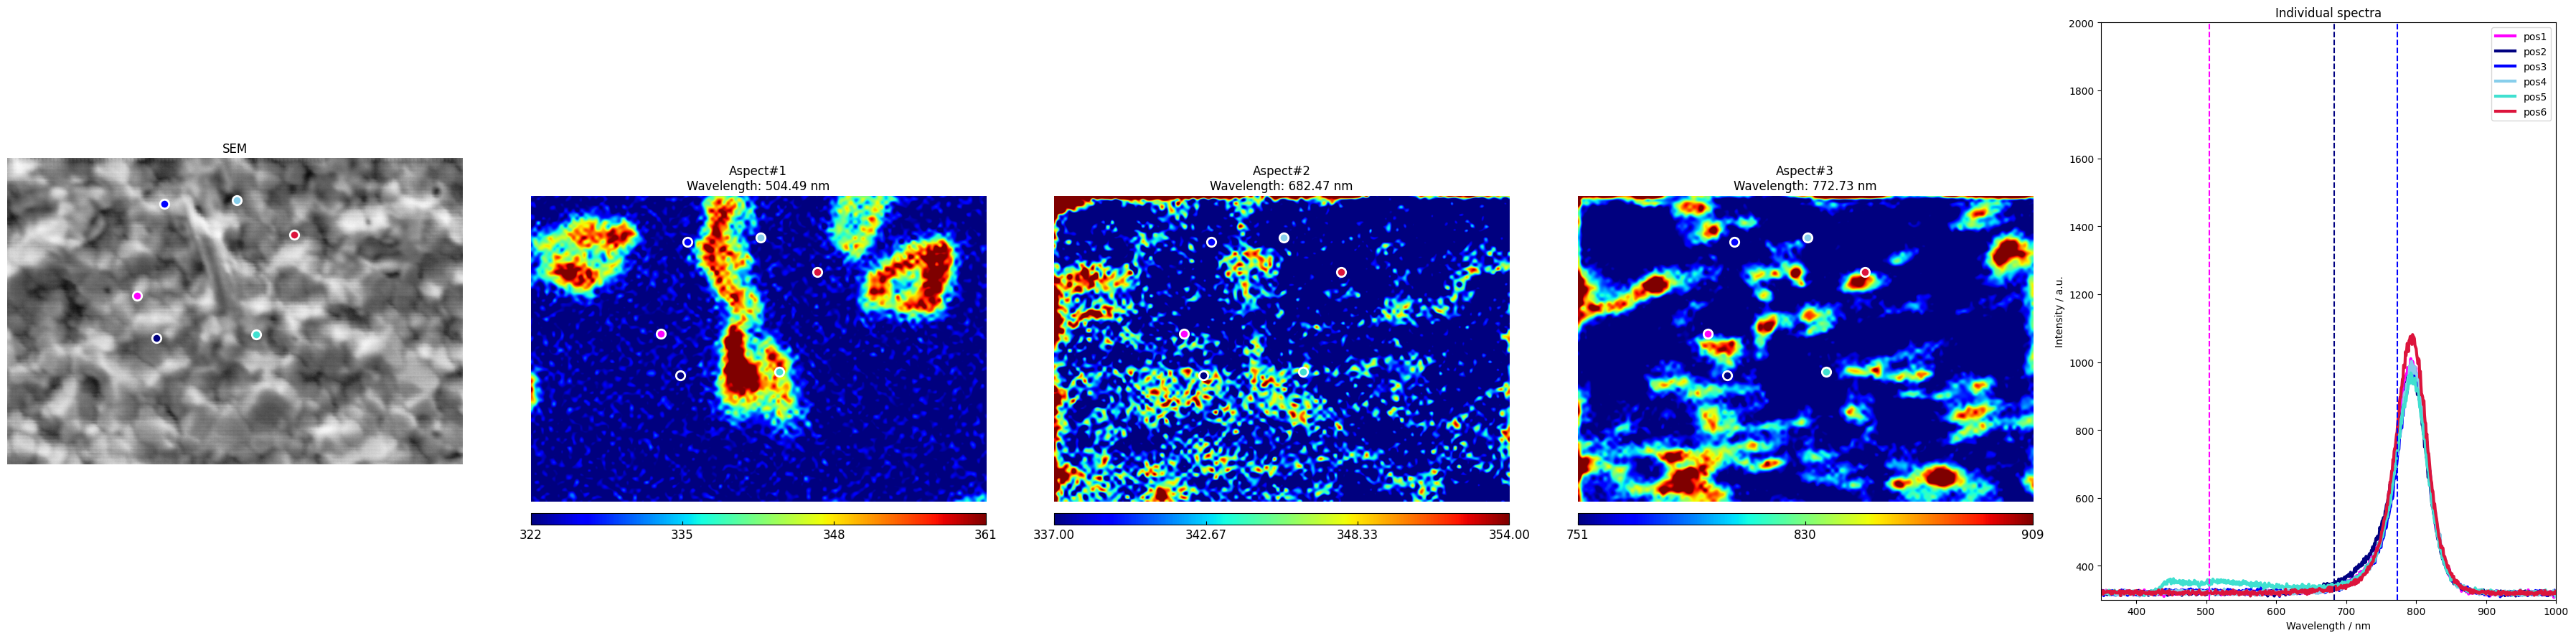

Slice 402 corresponds to wavelength: 504.49 nm
Slice 611 corresponds to wavelength: 682.47 nm
Slice 717 corresponds to wavelength: 772.73 nm


In [27]:
# Assuming positions are adjusted for the SEM image scale
positions = {
  'pos1': [34, 36],  # Example position in hdata coordinates
    'pos2': [39, 47],   # Example position in hdata coordinates
    'pos3': [41, 12],  # Example position in hdata coordinates
    'pos4': [60, 11],  # Example position in hdata coordinates
    'pos5': [65, 46],  # Example position in hdata coordinates
    'pos6': [75, 20],  # Example position in hdata coordinates
}

# Define slices corresponding to different aspects
slices = [402, 611, 717]

# Calculate scaling factors based on SEM and CL map dimensions
scale_x = im1.shape[1] / hdata.shape[1]  # Width scaling factor
scale_y = im1.shape[0] / hdata.shape[0]  # Height scaling factor

# Rescale CL maps to match SEM image dimensions and calculate vmin and vmax automatically
rescaled_cl_maps = []
for s in slices:
    rescaled_map = zoom(hdata[..., s], (scale_y, scale_x))
    vmin = np.floor(np.percentile(rescaled_map, 50))  # Using a higher percentile for vmin, floored to whole number
    vmax = np.ceil(np.percentile(rescaled_map, 98))  # Using a lower percentile for vmax, ceiled to whole number
    rescaled_cl_maps.append((rescaled_map, vmin, vmax))

# Plotting the SEM image and rescaled CL maps with scatter points and scale bars
fig, ax = plt.subplots(1, 5, figsize=(36, 9))  # Adjusted figsize to make CL maps larger and match the scale bars

# Plot SEM image without labeled positions
ax[0].imshow(im1, cmap='Greys_r')
colors = ['magenta', 'navy', 'blue', 'skyblue', 'turquoise', 'crimson']
for i, (label, pos) in enumerate(positions.items()):
    scaled_pos = np.array(pos) * [scale_x, scale_y]
    ax[0].scatter(*scaled_pos, c=colors[i], marker='o', edgecolor='white', linewidth=2, s=80)
ax[0].set_title('SEM')
ax[0].axis('off')

# Define wavelength range
wavelength = np.linspace(162.17, 1033.31, 1024)

# Plot the rescaled CL maps with scatter points and scale bars
for i, (rescaled_map, vmin, vmax) in enumerate(rescaled_cl_maps):
    im = ax[i+1].imshow(rescaled_map, cmap='jet', origin="upper", vmin=vmin, vmax=vmax)
    for pos, color in zip(positions.values(), colors):
        ax[i+1].scatter(pos[0]*scale_x, pos[1]*scale_y, c=color, marker='o', edgecolor='white', linewidth=2, s=80)
    wavelength_value = wavelength[slices[i]]
    ax[i+1].set_title(f'Aspect#{i+1}\nWavelength: {wavelength_value:.2f} nm')
    ax[i+1].axis('off')

    # Adjust the number of ticks for better readability
    num_ticks = 4 if i != 2 else 3  # Reduce the number of ticks for the third aspect
    cbar = plt.colorbar(im, ax=ax[i+1], aspect=40, orientation='horizontal', pad=0.02)
    cbar.set_ticks(np.linspace(vmin, vmax, num_ticks))  # Set ticks as whole numbers and reduce their number
    cbar.ax.tick_params(axis='x', direction='in', labelsize=12)

# Plot the individual spectra with the wavelength range on the last axis
ax[4].clear()  # Ensure no background is plotted
for label, pos, color in zip(positions.keys(), positions.values(), colors):
    ax[4].plot(wavelength, hdata[pos[1], pos[0], :], linewidth=3, c=color, label=label)

# Add vertical lines at the corresponding wavelengths for the slices
for i, s in enumerate(slices):
    ax[4].axvline(x=wavelength[s], linestyle='--', c=colors[i])

ax[4].set_title('Individual spectra')
ax[4].set_xlabel('Wavelength / nm')
ax[4].set_ylabel('Intensity / a.u.')
ax[4].set_xlim(350, 1000)
ax[4].set_ylim(300, 2000)
ax[4].legend(loc='upper right')

plt.tight_layout()
plt.show()

for i, s in enumerate(slices):
    wavelength_s = wavelength[s]
    print(f'Slice {s} corresponds to wavelength: {wavelength_s:.2f} nm')

Depending on the data sets, there will be several phases presented that can be roughly identified based on peak positions. We see some positions have more than one phase present at a time where as some may only have a single peak. Let's try clustering on it.

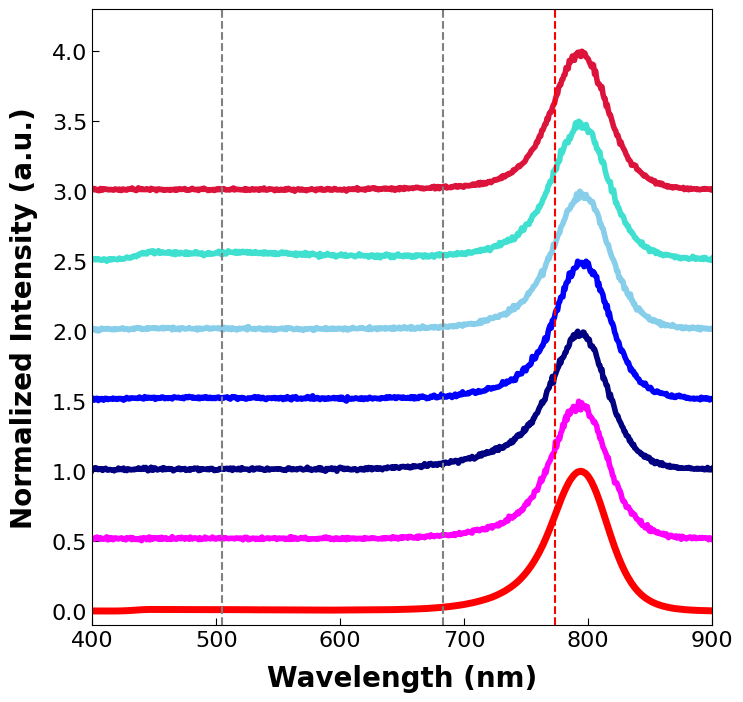

In [28]:
hdata_s = hdata.mean(axis=(0, 1))

normalized_spectra = {}
for label, pos in positions.items():
    spectrum = hdata[pos[1], pos[0], :]
    normalized_spectra[label] = (spectrum - np.min(spectrum)) / (np.max(spectrum) - np.min(spectrum))


plt.figure(figsize=(8, 8))  # Increase figure size for better visibility
plt.plot(wavelength, (hdata_s - np.min(hdata_s)) / (np.max(hdata_s) - np.min(hdata_s)), c='red', linewidth=5, label='Mean Spectrum')


colors = ['magenta', 'navy', 'blue', 'skyblue', 'turquoise', 'crimson']
offset = 0.5  # Increase the offset to avoid overlap

for i, (label, spectrum) in enumerate(normalized_spectra.items()):
    plt.plot(wavelength, spectrum + offset * (i + 1), c=colors[i], linewidth=4, label=label)

plt.axvline(x=505, linestyle='--', c='gray', label='505 nm')
plt.axvline(x=683, linestyle='--', c='gray', label='405 nm')
plt.axvline(x=773, linestyle='--', c='red', label='687 nm')

plt.xlabel('Wavelength (nm)', fontsize=20, labelpad=10, fontweight='bold')
plt.ylabel('Normalized Intensity (a.u.)', fontsize=20, labelpad=10, fontweight='bold')
plt.tick_params(axis='x', length=5, labelsize=16, direction='in')
plt.tick_params(axis='y', length=5, labelsize=16, direction='in')
plt.xlim(400, 900)
plt.ylim(-0.1, offset * (len(positions) + 2) + 0.3)  # Adjust ylim to match the increased offset
#plt.legend(fontsize=12, loc='upper right')

plt.show()

## Manual segmentation for comparison

Let's explore treshold based segmentation. Note that these regions are overlapping, so here one pixel can belong to more then one class.

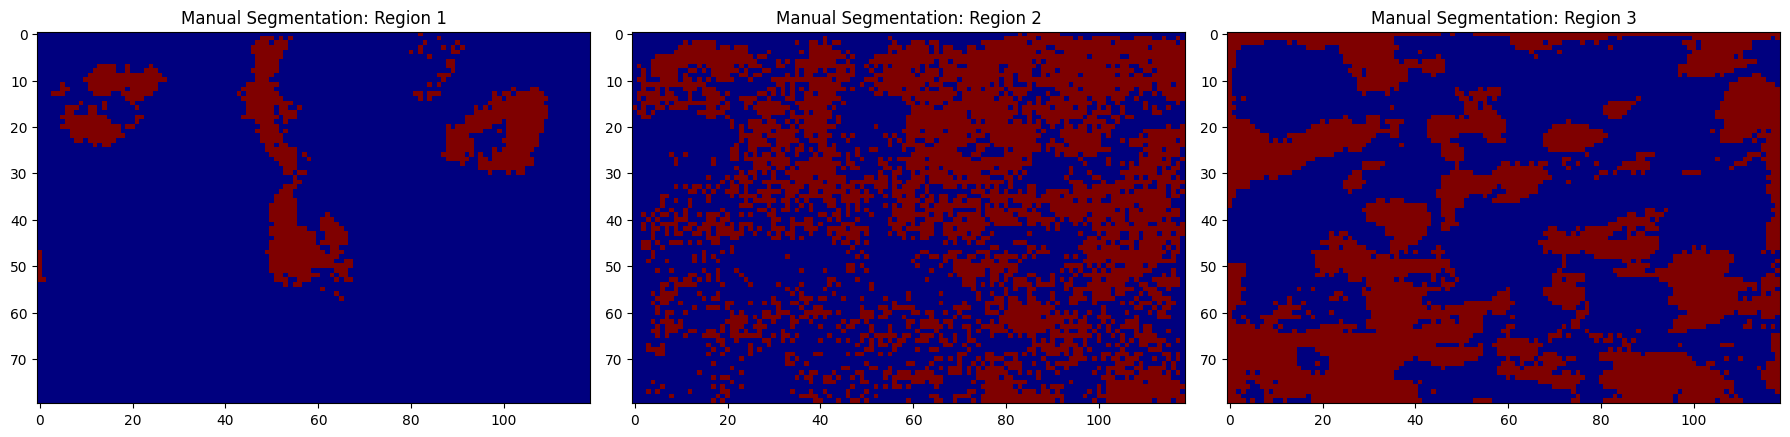

In [29]:
# Assuming slices and hdata are already loaded
s1, s2, s3 = 402, 611, 717

# Extract individual slice data
im_s1 = hdata[..., s1]
im_s2 = hdata[..., s2]
im_s3 = hdata[..., s3]

# Determine thresholds dynamically based on percentile or other criteria
threshold_s1 = np.percentile(im_s1, 90)  # For phase 1
threshold_s2 = np.percentile(im_s2, 50)  # For phase 2
threshold_s3 = np.percentile(im_s3, 60)  # For phase 3

# Apply manual segmentation based on calculated thresholds
im_s1cut = im_s1 > threshold_s1
im_s2cut = im_s2 < threshold_s2
im_s3cut = im_s3 > threshold_s3

# Reshape for visualization
h, w = hdata.shape[:2]
im_s1cut_reshaped = im_s1cut.reshape(h, w)
im_s2cut_reshaped = im_s2cut.reshape(h, w)
im_s3cut_reshaped = im_s3cut.reshape(h, w)

# Plot manual segmentation
_, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(im_s1cut_reshaped, origin="upper", cmap="jet")
ax[0].set_title("Manual Segmentation: Region 1")

ax[1].imshow(im_s2cut_reshaped, origin="upper", cmap="jet")
ax[1].set_title("Manual Segmentation: Region 2")

ax[2].imshow(im_s3cut_reshaped, origin="upper", cmap="jet")
ax[2].set_title("Manual Segmentation: Region 3")

plt.tight_layout()
plt.show()

# Store manual segmentation labels for ground truth (combine regions into one label map)
ground_truth = np.zeros_like(im_s1cut_reshaped, dtype=int)
ground_truth[im_s1cut_reshaped] = 1  # Label for Region 1
ground_truth[im_s2cut_reshaped] = 2  # Label for Region 2
ground_truth[im_s3cut_reshaped] = 3  # Label for Region 3

## Problem II.1. Clustering of spectral data

Problem II.1.1:
- Realize a set of classifiers for the spectral data
- For each classifier, plot the label map and the cluster centroids
- Compare the quality of clustering to the physical segmentation labels above (note that these are not mutually exclusive).


Problem II.1.2:
- The cluster labels will be different between different classifiers
- Suggest an approach to compare the classification results between different methods

Problem II.1.3:
- Explore the dimensionality reduction of the data using the PCA
- Visualize the loading maps and components
- Plot the data in the PCA space and visualize the distribution of the physics based segmentation labels
- Cluster the data in the 2D PCA space
- Compare the resultant labels and the physics based segmentation labels.

## Problem II.2: Supervised learning

Here, we will need to define the class labels. Since we do not have independent access to them, let's use the results of k-means clustering that you have done above as the ground truth labels.

In [30]:
# Assuming 'kmeans_labels' are the clustering labels from KMeans
'''
spectral_labels_reshaped = kmeans_labels.reshape(h, w)  # If you're using KMeans for spectral clustering

# Flatten the CL data (hdata) for supervised learning
h, w, spectra_size = hdata.shape
spectra_all_points = hdata.reshape(-1, spectra_size)

# Flatten the clustering labels for supervised learning
labels_all_points = spectral_labels_reshaped.reshape(-1)
'''

"\nspectral_labels_reshaped = kmeans_labels.reshape(h, w)  # If you're using KMeans for spectral clustering\n\n# Flatten the CL data (hdata) for supervised learning\nh, w, spectra_size = hdata.shape\nspectra_all_points = hdata.reshape(-1, spectra_size)\n\n# Flatten the clustering labels for supervised learning\nlabels_all_points = spectral_labels_reshaped.reshape(-1)\n"

Problem II.2.1:
- Split the data in the train/test sets, assuming 10% for training and 90% for testing
- Realize the logistic, perceptron, kNN, and SVM classifiers
- Plot the class maps
- Construct the ROC curves

Problem II.2.2:
- Explore the effect of the decision treshold parameter for the logistic classifier
- Plot class maps for tresholds 0.01, 0.1, 0.5, 0.9, 0.99

Problem II.2.3:
- Based on the class maps, suggest criteria on how "good" maps can be identified.

# III. Discovering phases and ferroelectric domains

**Lets Install some usefull packages**

In [31]:
# Installing Kornia and pyroved
!pip install -q kornia atomai git+https://github.com/ziatdinovmax/pyroVED@main
!pip install colorspacious
!pip install wget

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 119.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=00fe1722396cf620b840e8f6ac0d1e2229eea6a326d06b7248f286dc8f778d02
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


**Import libraries**

In [32]:
from atomai import utils
from atomai import stat as atomstat
import atomai as aoi

In [33]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [35]:
import gdown
import h5py
import wget
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.patches as patches

<span style="color: blue; font-size: 18px;"><strong>Download Dataset</strong></span>

This data set is the collection of high resolution electron microscopy images of the ferroelectric BiFeO3 doped with Sm. The samples were prepared as combinatorial library by Prof. Ichiro Takeuchi group (University of Maryland). The STEM data was taken and physics based analysis was performed by Dr. Chris Nelson (Oak Ridge). Data sharing enables downstream applications and is common in many scientific domains (structural data, thermodynamics, genomics, theoretical computational databases). It is an emerging trend in areas such as microscopy. Note that making data available is a part of FAIR principles and is now mandated by funding agencies in US (NSF, DOE, etc).  

Now, we have access to the SmBFO STEM image with Sm = 0, 7, 10, 13% compositions. Note that Sm = 0 composition is the pure rhombohedral ferroelectric, whereas high Sm concentrations are orthorhombic non-ferroelectric material. Since rhombohedral and orthorhombic phases are crystallograhically incompartible, the phases with intermediate Sm concentrations have to acocmodate this structural mismatch by forming complex nanoscale structures. In macroscopic scattering data, they can show period doubling, low-symmetry phases, etc. - however, their true nanoscale strucutre is understood only poorly. These morphotropic systems also have interesting macroscopic properties such as enhanced dielectric and electromechnical properties. So, let's dive in into atomic world of these systems!

In [36]:
model_files = ['Sm_0_1_HAADF.h5',
               'Sm_0_1_UCParameterization.h5',
               'Sm_7_2_HAADF.h5',
               'Sm_7_2_UCParameterization.h5',
               'Sm_10_1_HAADF.h5',
               'Sm_10_1_UCParameterization.h5',
               'Sm_13_0_HAADF.h5',
               'Sm_13_0_UCParameterization.h5',
               'Sm_20_0_HAADF.h5',
               'Sm_20_0_UCParameterization.h5']

for model_file in model_files:
  print(model_file)
  wget.download("https://zenodo.org/record/4555979/files/"+model_file+"?download=1", out=model_file)

Sm_0_1_HAADF.h5


KeyboardInterrupt: 

In [ ]:
#list files
filedir = '/content'
[f for f in os.listdir(filedir)]

In [ ]:
#image files
composition_tags = [0,7,10,13,20]    #Sm composition %


img_filename = ['Sm_0_1_HAADF.h5',
                'Sm_7_2_HAADF.h5',
                'Sm_10_1_HAADF.h5',
                'Sm_13_0_HAADF.h5',
                'Sm_20_0_HAADF.h5',]

imnum = len(img_filename)

#parametrization files

UCparam_filename = ['Sm_0_1_UCParameterization.h5',
                    'Sm_7_2_UCParameterization.h5',
                    'Sm_10_1_UCParameterization.h5',
                    'Sm_13_0_UCParameterization.h5',
                    'Sm_20_0_UCParameterization.h5',]

#load parameter files
UCparam = []
for x in UCparam_filename:
  print('loading parameterization file: ', os.path.join(filedir, x))
  temp = h5py.File(os.path.join(filedir, x), 'r')
  UCparam.append(temp)

#load images
imgdata = []
for x in img_filename:
  print('loading image file: ', os.path.join(filedir, x))
  temp = h5py.File(os.path.join(filedir, x), 'r')['MainImage']
  imgdata.append(temp)

print('UC parameterization:', [k for k in UCparam[0].keys()])

- In addition to the raw STEM data, the parametrization files yield the information on each unit cell within the data that we can use as a physics-based comparison to ML analyses. For example, I1-5 are intensity of atomic columns, Vol is unit cell volume, Pxy are polarization components, and so on.
- Note that since the physics of these systems is not known exactly (that is why we are studying them!), ML can discover new phenomena that were not acocunted for in physics-based descriptors.
- Look though the code below and try to follow how we store and organize the data.  

In [ ]:
#function maps x,y grid positions into a matrix data format
def map2grid(inab, inVal):

  default_val = np.nan
  abrng = [int(np.min(inab[:,0])), int(np.max(inab[:,0])), int(np.min(inab[:,1])), int(np.max(inab[:,1]))]
  abind = inab
  abind[:,0] -= abrng[0]
  abind[:,1] -= abrng[2]
  Valgrid = np.empty((abrng[1]-abrng[0]+1,abrng[3]-abrng[2]+1))
  Valgrid[:] = default_val
  Valgrid[abind[:,0].astype(int),abind[:,1].astype(int)]=inVal[:]
  return Valgrid, abrng

In [ ]:
def plot_polarization_vectors(k):

    # Prepare vector components and positions
    X = k['ab_x'].ravel()
    Y = k['ab_y'].ravel()
    U = k['ab_Px'].ravel()
    V = k['ab_Py'].ravel()

    # Rotate coordinates 90 degrees counter-clockwise
    X_rot = -Y
    Y_rot = X

    # Invert y-axis
    Y_rot = -Y_rot

    # Rotate vector components
    U_rot = -V
    V_rot = U

    # Invert y-axis component of vectors
    V_rot = -V_rot

    # Compute magnitude and direction of the polarization vectors
    # Compute magnitude and direction of the polarization vectors
    Pmag = np.sqrt(U**2 + V**2)
    Pdir = np.arctan2(V, U)

    # Normalize magnitude for color scaling (clip at 90th percentile to avoid outliers)
    Pmag_norm = np.clip(Pmag / np.nanpercentile(Pmag, 90), 0, 1)

    # Define the colormap for mapping the direction and magnitude
    # Since 'papuc' may not be available, we'll use a built-in colormap

    # Normalize direction to [0, 1] for colormap mapping
    norm = Normalize(vmin=-np.pi, vmax=np.pi)
    cmap = cm.hsv  # Using HSV colormap to represent directions

    # Map direction to colors
    cP = cmap(norm(Pdir))

    # Alternatively, adjust colors based on magnitude if desired
    # For this simple example, we'll just use direction for color
    return Y, X, U, V, cP

In [ ]:
SBFOdata = []     #this will be the output list of dictionaries for each dataset

for i in np.arange(imnum):
  temp_dict = {'Index': i}
  temp_dict['Composition'] = composition_tags[i]
  temp_dict['Image'] = imgdata[i]
  temp_dict['Filename'] = img_filename[i]

  for k in UCparam[i].keys():       #add labels for UC parameterization
    temp_dict[k] = UCparam[i][k][()]

  #select values mapped to ab grid
  temp_dict['ab_a'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['ab'][()].T[:,0])[0]       #a array
  temp_dict['ab_b'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['ab'][()].T[:,1])[0]       #b array
  temp_dict['ab_x'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['xy_COM'][()].T[:,0])[0]   #x array
  temp_dict['ab_y'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['xy_COM'][()].T[:,1])[0]   #y array
  temp_dict['ab_Px'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['Pxy'][0])[0]             #Px array
  temp_dict['ab_Py'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['Pxy'][1])[0]        #Py array
  temp_dict['Vol'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['Vol'])[0]     #Vol array

  SBFOdata.append(temp_dict)

Explore the structure of the SBFOdata object. Are the comments in the code sufficient to interpret what are the individual elements in it?

In [ ]:
SBFOdata[1].keys()

In [ ]:
SBFOdata[1]['ab_a'].shape

Now, let's visualize the images and corresponding distributions of polarization components Px, Py, and unit cell volume Vol

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=len(SBFOdata), figsize=(4*len(SBFOdata), 4*3), dpi=100)
for i, k in enumerate(SBFOdata):
  #Image
  ax[0,i].imshow(k['Image'], origin='upper', cmap='gray')
  ax[0,i].set_title(str(k['Index'])+': '+str(k['Composition'])+'%', fontsize = 24, fontweight = "bold")
  ax[0,i].set_axis_off()
  #Px
  ax[1,i].imshow(k['ab_Px'], origin='upper', cmap='coolwarm')
  ax[1,i].set_axis_off()
  #Py
  ax[2,i].imshow(k['ab_Py'], origin='upper', cmap='coolwarm')
  ax[2,i].set_axis_off()

  # Vol (added row to display Vol)
  ax[3, i].imshow(k['Vol'], origin='upper', cmap='coolwarm')
  ax[3, i].set_axis_off()

As you can see, for low Sm concentrations the olarization maps show clear ordered ferroelectric domains.On increasing Sm concentration, they become more disordered and then disappear for 20% Sm. Also note that unit cell volume map shows (some) variation between material and substrate, does not show variations associated with the domains, and also shows smooth changes across the image plane. The latter are associated with non-ideality of the microscope (the mis-tilt effects).

You can also note the missing regions on the last image. These correspond to the regions that contained growth defects and were removed during the curation of the data set.

## **Problem III.1:** Classification of ferroic domains

Now, let's experiment with the practical problem.
- Let's assume that we **know** the phase/ferroic orientation in several regions of the material. These will be our labels.
- Given these labels, we would like to classify the remaining parts of the image.
- However, for the time being we also **do not** have any information about atomic positions, physical order parameter fields, etc. All we have access to is the image data. Can we classify the regions in the image given small amount of known labels?

Let's do it for pure BFO (with well defined domains), corresponding to imgdata[0]. We will use the sliding window approach, representing the image as a collection of image patches of certain size taken from the grid of points. Explore the code below to identify how this is done.


In [ ]:
img_array = np.array(imgdata[0])
scaler = preprocessing.StandardScaler().fit(img_array)
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(img_array)

window_size = 50
step_size = 6

# Generate a grid of coordinates based on the step size
coordinates = aoi.utils.get_coord_grid(X_scaled, step_size)

# Extract the coordinates from the first element (assuming it's the desired set)
coords = coordinates[0]

# Extract subimages, centers of mass, and frame numbers based on the generated grid
imstack_grid, com_grid, frames_grid = aoi.utils.extract_subimages(X_scaled, coords, window_size)

# Output the shape of the extracted image stack
print(imstack_grid.shape)
print(com_grid.shape)
print(frames_grid.shape)

Below, we
- Create array of the same length as coordinate and patches filled by zeros
- Identify spatial regions that are substrate, domain 1, 2, and 3
- For coordinates that fall within these, we change labels from 0 to 1,2,3 respectively.

With that, we will have coordinate array, patch array, and label array where 1,2,3 are known labels and 0 are unknown labels. And they can experiment with window sizes and all arrays will be recalculated.


In [ ]:
# Initialize a label array of zeros
label_array = np.zeros(len(com_grid), dtype=int)

In [ ]:
# Define spatial regions (
substrate_region = [3000, 3150, 400, 550]  # Substrate region
domain1_region = [2000, 2150, 1000, 1150]  # Domain 1 region
domain2_region = [3000, 3150, 2000, 2150]  # Domain 2 region
domain3_region = [1000, 1150, 2000, 2150]  # Domain 3 region

In [ ]:
# Ensure that com_grid and label_array are of the same size before processing
if len(label_array) != len(com_grid):
    raise ValueError("label_array and com_grid must have the same length!")

# Assign labels based on the coordinates falling within the regions
for i, (x, y) in enumerate(com_grid):
    if substrate_region[0] <= x <= substrate_region[1] and substrate_region[2] <= y <= substrate_region[3]:
        label_array[i] = 1  # Substrate
    elif domain1_region[0] <= x <= domain1_region[1] and domain1_region[2] <= y <= domain1_region[3]:
        label_array[i] = 2  # Domain 1
    elif domain2_region[0] <= x <= domain2_region[1] and domain2_region[2] <= y <= domain2_region[3]:
        label_array[i] = 3  # Domain 2
    elif domain3_region[0] <= x <= domain3_region[1] and domain3_region[2] <= y <= domain3_region[3]:
        label_array[i] = 4  # Domain 3

# Output the label array and its distribution to check the correctness
print("Label array:", label_array)
print("Distribution of labels:", np.unique(label_array, return_counts=True))

# Ensure that label_array, com_grid, and imstack_grid are aligned in size
print("Coordinates shape (com_grid):", com_grid.shape)
print("Image stack shape (imstack_grid):", imstack_grid.shape)
print("Label array shape:", label_array.shape)

This is our label array. The region 0 are unknown, the regions 1,2,3, and 4 are known labels.

In [ ]:
# Example regions to mark on the plot
regions = {
    'substrate_region': (400, 3000, 150, 150),
    'domain1_region': (2000, 1000, 150, 150),
    'domain2_region': (2000, 3000, 150, 150),
    'domain3_region': (1000, 2000, 150, 150)
}

# Assuming 'main' and 'SBFOdata' are defined
main = [350, 4000, 350, 4100]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Visualize the label map on the first subplot
axes[0].scatter(com_grid[:, 1], com_grid[:, 0], c=label_array, cmap='jet', s=10)
axes[0].set_title('Label Map')
axes[0].set_xlabel('X Coordinate')
axes[0].set_ylabel('Y Coordinate')
axes[0].invert_yaxis()
axes[0].axis("off")
axes[0].set_xlim(main[0], main[1])
axes[0].set_ylim(main[2], main[3])

# Plot the polarization vectors on the second subplot
k = SBFOdata[0]  # Assuming SBFOdata is well defined with necessary keys
Y, X, U, V, cP = plot_polarization_vectors(k)
axes[1].quiver(Y, X, U, V, color=cP, scale=0.1, angles='xy', scale_units='xy', width=0.002)
axes[1].set_title('Ground Truth')
axes[1].set_xlim(main[0], main[1])
axes[1].set_ylim(main[2], main[3])
axes[1].axis("off")

# Add regions as rectangles on the second subplot
for region_name, (x, y, width, height) in regions.items():
    # Create a rectangle at each region
    rect = Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none', label=region_name)
    axes[1].add_patch(rect)

# Optionally, add a legend if needed
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
# Split the labeled and unlabeled data
labeled_indices = np.where(label_array > 0)[0]  # Indices where labels are known
unlabeled_indices = np.where(label_array == 0)[0]  # Indices where labels are unknown

# Prepare the training data (patches and labels)
X_train = imstack_grid[labeled_indices]  # Known patches (train data)
y_train = label_array[labeled_indices]  # Corresponding labels (1, 2, 3)

# Prepare the test data (patches without labels)
X_test = imstack_grid[unlabeled_indices]  # Patches for unknown labels (test data)
# Check if there are any unknown labels (0s) in the label_array
print(f"Number of unlabeled data points: {np.sum(label_array == 0)}")

# Flatten patches (if needed) for RandomForest input
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten for training
X_test_flat = X_test.reshape(X_test.shape[0], -1)  # Flatten for testing

print(f"Number of unlabeled data points: {np.sum(label_array == 1)}")

Problem III.1.1:
- define several classifiers
- classify the unknown points
- make the map of the class labels for each classifier
- create average class labels and uncertainty map based on multiple classifiers.

Problem II.1.2:
- Choose one classifier
- Explore the effect of the window size on classification

Problem II.1.3:
- For the regions outside of the labeled ones, we do not have access to the ground truth data (so we can define confusion matrix/ROC/AUC only **within** labeled regions)
- However, we do have access to ground truth data (Px,Py, Vol) and all other descriptors
- Suggest a startegy to estimate the quality of classification if the ground truth labels are not available, but we have access to (Px,Py, Vol). Realize it for one classifier.

## **Problem III.2:** Unsupervised exploration

Now, let's explore one of the intermediate concentrations of Sm images using sliding window approach. Let's proceed as following:
- Import one of the images for the intermediate concentrations that show the presence of ferroelectric and ordered phases. Choose an image!
- Create a standard data sets, meaning coordinate array and matching array of patches. Here we add additional degree of freedom by allowing the window to be rectangular, (w1,w2).
- Let's  explore clustering given the patches, and explore window size effects

Custom function for chosing rectangular windows

In [ ]:
def custom_subimages(imgdata, step_size, window_size):
    # Generate coordinates based on step size
    height, width = imgdata.shape[:2]
    x_coords = np.arange(0, height - window_size[0] + 1, step_size)
    y_coords = np.arange(0, width - window_size[1] + 1, step_size)
    coordinates = [(x, y) for x in x_coords for y in y_coords]

    # Extract subimages of the specified window size
    half_height = window_size[0] // 2
    half_width = window_size[1] // 2
    subimages_target = []
    coms_target = []
    removed_due_to_size = 0
    removed_due_to_nans = 0

    for coord in coordinates:
        cx, cy = coord
        top = max(cx - half_height, 0)
        bottom = min(cx + half_height, height)
        left = max(cy - half_width, 0)
        right = min(cy + half_width, width)

        subimage = imgdata[top:bottom, left:right]

        if subimage.shape != tuple(window_size):
            removed_due_to_size += 1
        elif np.isnan(subimage).any():
            removed_due_to_nans += 1
        else:
            subimages_target.append(subimage)
            coms_target.append(coord)

    print("Number of subimages removed due to size mismatch:", removed_due_to_size)
    print("Number of subimages removed due to NaNs:", removed_due_to_nans)

    return np.array(subimages_target), np.array(coms_target)

In [ ]:
window_size = (12, 20)
step_size = 12

imstack_grid, com_grid = custom_subimages(imgdata[0], step_size, window_size)

print(imstack_grid.shape)
print(com_grid.shape)

Problem III.2.1:
- Select image and window size
- Cluster the image patches
- Visualize the labels map
- Estimate the required number of clusters


Problem II.2.2:
- Let's assume that we want to compare multiple clustering approaches. The problem is that cluster labels are assigned randomly, meaning (0,1,2) in one clustering method will not match the labels from other method
- Suggest and realize approach to align the labels between different clustering methods

Problem III.2.3:
- Realize 3 different clustering methods of the data
- Align the labels
- Plot the average and uncertainty maps